MLP to classifier 

In [3]:
%matplotlib inline

In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import transforms 

In [5]:
fashMNIST = keras.datasets.fashion_mnist

In [6]:
(xTrainFull,yTrainFull),(xTest, yTest) = fashMNIST.load_data()

In [7]:
xTrainFull.shape, yTrainFull.dtype

((60000, 28, 28), dtype('uint8'))

#### First Tasks:
- create a validation/dev set
- scale features for gradient Descent

In [8]:
xValidation, xTrain = xTrainFull[:5000]/255, xTrainFull[5000:]/255
yValidation, yTrain = yTrainFull[:5000], yTrainFull[5000:]

In [9]:
xTest = xTest/255

#### Classes

In [18]:
classNames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal",
              "Shirt","Sneaker","Bag","Ankle boot"]
len(classNames)

10

#### Have a look at the data

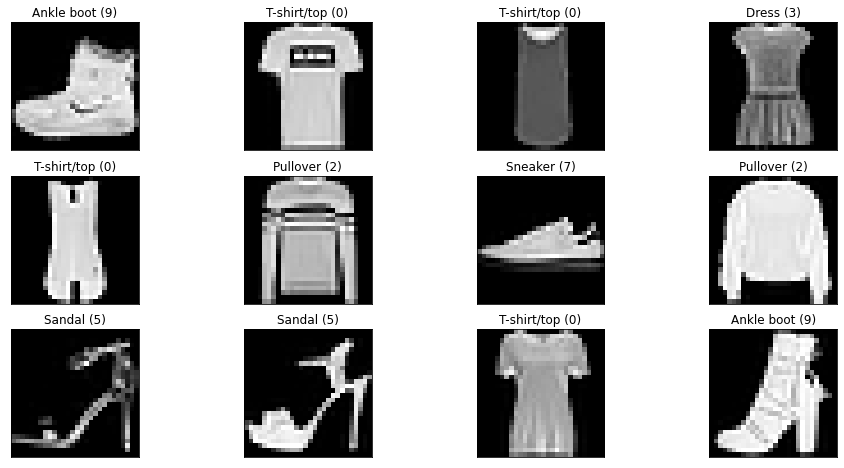

In [16]:
trans = transforms.ToPILImage()
w=10
h=10
fig=plt.figure(figsize=(16, 8))
columns = 4
rows = 3
#Could look at TF visuliations
#https://www.tensorflow.org/datasets/api_docs/python/tfds/visualization/ImageGridVisualizer
for i in range(1, columns*rows +1):
    img = trans(xTrainFull[i-1])
    ax = fig.add_subplot(rows, columns, i)
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.title.set_text(str(classNames[yTrainFull[i-1]]) +" ("+ str(yTrainFull[i-1])+ ")")
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)   

img = trans(xTrainFull[0])

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()
#hidden layer 1 has 784 (from pixle array 28*28) plus 1 bias connection (equaling 785 connections)
#Times by number of nodes (300) for a total of 235500 params

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [26]:
history = model.fit(xTrain,yTrain,epochs=30,validation_data=(xValidation,yValidation))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2225 - accuracy: 0.9200 - val_loss: 0.2990 - val_accuracy: 0.8912
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2187 - accuracy: 0.9216 - val_loss: 0.3006 - val_accuracy: 0.8936
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2146 - accuracy: 0.9234 - val_loss: 0.3275 - val_accuracy: 0.8862
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2117 - accuracy: 0.9243 - val_loss: 0.2955 - val_accuracy: 0.8886
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2080 - accuracy: 0.9255 - val_loss: 0.2934 - val_accuracy: 0.8942
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2049 - accuracy: 0.9272 - val_loss: 0.2949 - val_accuracy: 0.8944
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2008 - accuracy: 0.9284 - val_loss: 0.3001 - val_accuracy:

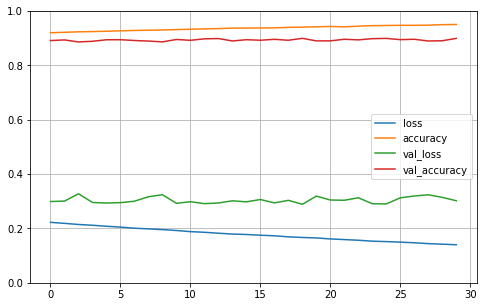

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
item = 11
p = model.predict(xTrainFull[:3])
p.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

T-shirt/top 0


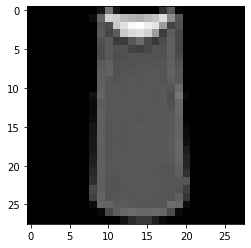

In [55]:
item= 2
img = trans(xTrainFull[item])
plt.imshow(img, cmap='gray', vmin=0, vmax=255)   
print(str(classNames[yTrainFull[item]] + " " + str(yTrainFull[item])))